
### Feature Selection-Information gain - mutual information In Classification Problem Statements¶

#### Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.</b>

#### Youtube Videos

Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
df['Wine'].unique()

array([1, 2, 3])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [29]:
X = df.drop('Wine',axis=1)
y = df['Wine']

In [30]:
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [35]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.42117347, 0.30034216, 0.15602746, 0.23688667, 0.17836121,
       0.47714717, 0.70978466, 0.13785721, 0.26201334, 0.62142182,
       0.54557054, 0.54651277, 0.53688578])

#### MI ranges from 0 to 1. If the value is high then that feature(column) is most important feature for target(dependent) value.

In [38]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
sorted = mutual_info.sort_values(ascending=False)
sorted

Flavanoids              0.709785
Color.int               0.621422
OD                      0.546513
Hue                     0.545571
Proline                 0.536886
Phenols                 0.477147
Alcohol                 0.421173
Malic.acid              0.300342
Proanth                 0.262013
Acl                     0.236887
Mg                      0.178361
Ash                     0.156027
Nonflavanoid.phenols    0.137857
dtype: float64

<AxesSubplot:>

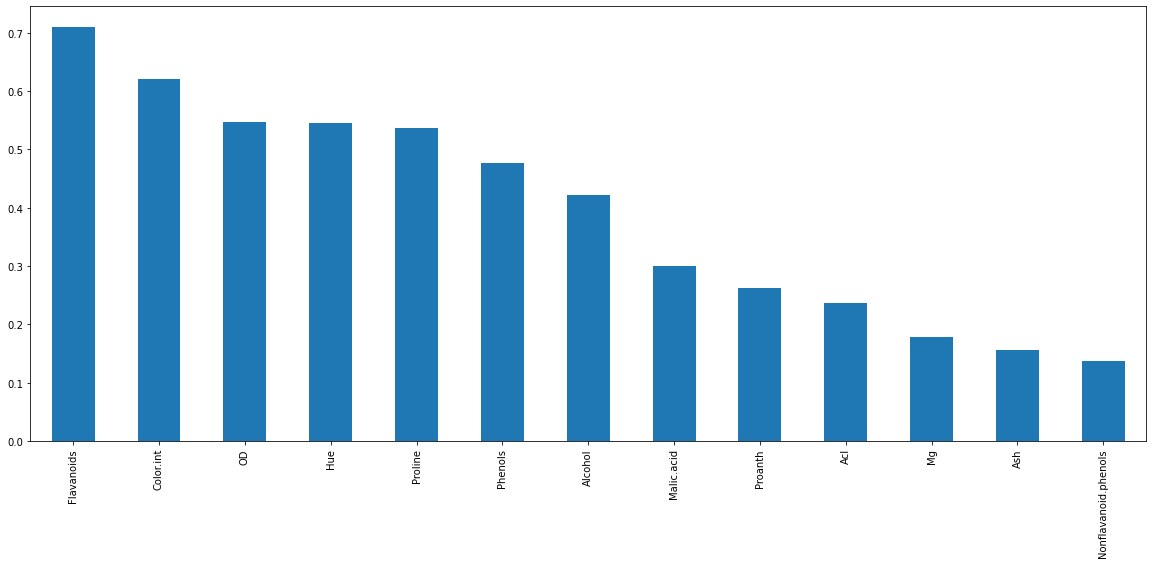

In [42]:
sorted.plot.bar(figsize=(20, 8))

In [44]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5) # k=5 --> Selects top 5 features
sel_five_cols.fit(X_train,y_train)
print(sel_five_cols.get_support())
X_train.columns[sel_five_cols.get_support()]

[False False False False False False  True False False  True  True  True
  True]


Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

### Comparion of Univariate And Mutual Information
Comparison of F-test and mutual information https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py